# Installation

## Install in local Python environment (where jupyter notebook is started):

```
python -m pip install ipywidgets pandas ipyevents ipycanvas
jupyter nbextension enable --py --sys-prefix ipyevents
```

## Install in Slicer Python environment (by running the cell below):

In [ ]:
# There are no official pyzmq wheels for Python-3.6 for Windows, so we have to install manually
import os
if os.name=='nt':
    pip_install("https://files.pythonhosted.org/packages/94/e1/13059383d21444caa16306b48c8bf7a62331ca361d553d2119696ea67119/pyzmq-19.0.0-cp36-cp36m-win_amd64.whl")

pip_install("ipywidgets pandas ipyevents ipycanvas")


# Interactive volume rendering
The entire view layout or selected widgets can be displayed in a notebook cell. Views can be shown using interactive widgets (slice scrolling, view rotation).
Rendering happens server-side, in Slicer, which can run on the cloud, on a container. Source data does not have to be sent to the user's computer.

IntProgress(value=0)

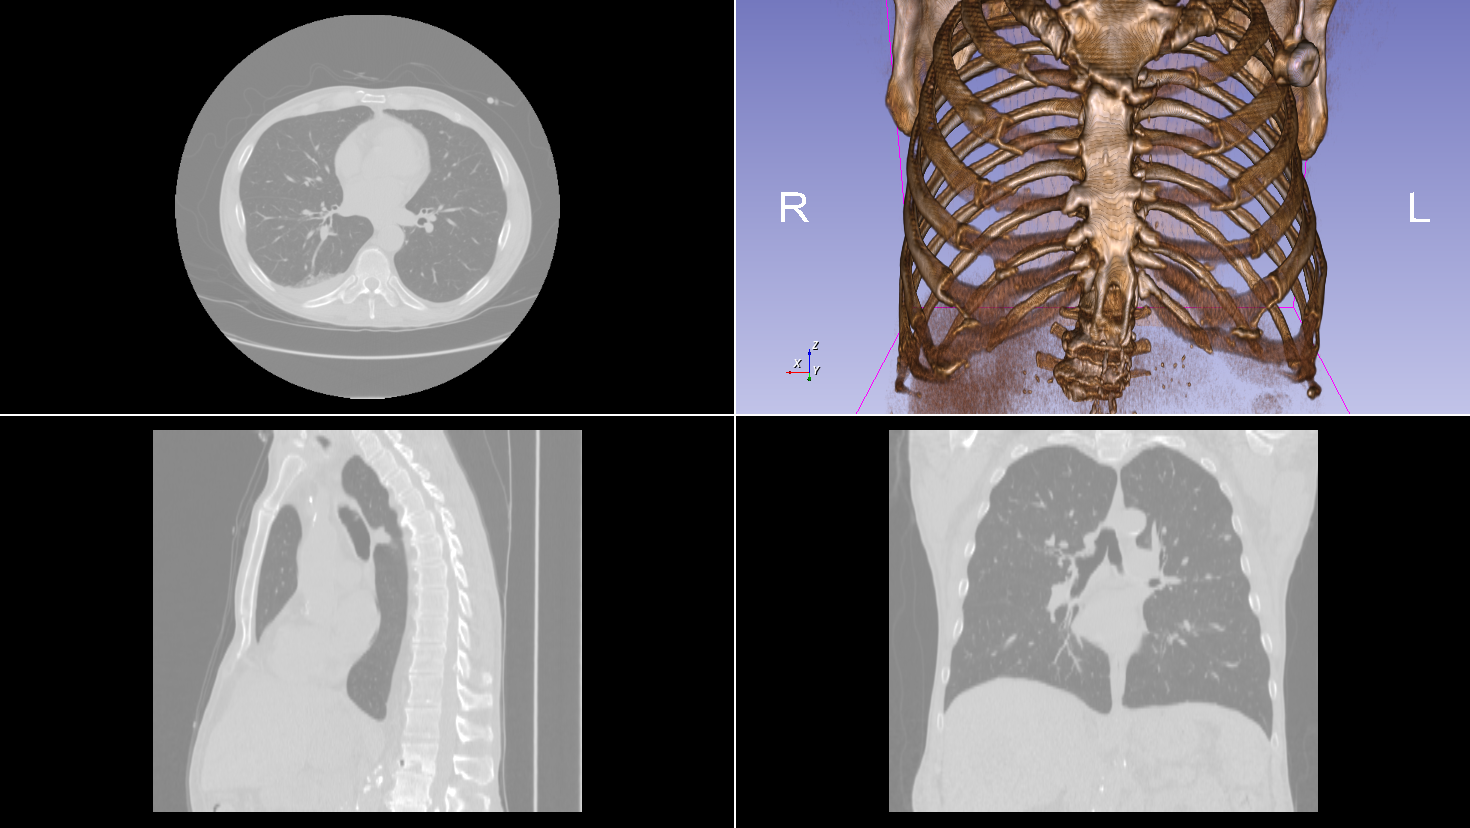

In [7]:
# Get a volume
slicer.mrmlScene.Clear()
volume = slicer.nb.downloadFromURL(
  'https://github.com/Slicer/SlicerTestingData/releases/download/SHA256/4507b664690840abb6cb9af2d919377ffc4ef75b167cb6fd0f747befdb12e38e',
  'CTChest.nrrd', "CT")[0]

# Enable 3D volume rendering
slicer.nb.showVolumeRendering(volume)

slicer.nb.displayViews("FourUp")

# Interactive visualization using mouse/keyboard over image

In [9]:
# Interactive 3D view using mouse over image
live3d = slicer.nb.InteractiveView(slicer.app.layoutManager().threeDWidget(0).threeDView())
live3d.trackMouseMove = True
display(live3d.canvas)

Canvas(height=384, width=734)

In [10]:
# Interactive slice view using mouse over image
liveRedSlice = slicer.nb.InteractiveView(slicer.app.layoutManager().sliceWidget('Red').sliceView())
display(liveRedSlice.canvas)

Canvas(height=384, width=734)

# Interactive visualization using sliders

In [11]:
# Interactive 3D view using sliders
from ipywidgets import interact

@interact(roll=(-90.0,90.0,5), pitch=(-90.0,90.0,5), yaw=(-180.0,180.0,5))
def update(roll=0, pitch=0, yaw=0):
    return slicer.nb.display3DView(0, orientation=[roll, pitch, yaw])

interactive(children=(FloatSlider(value=0.0, description='roll', max=90.0, min=-90.0, step=5.0), FloatSlider(v…

In [12]:
# Interactive slice view using sliders
from ipywidgets import interact
@interact(position=(0,100))
def update(position=50):
    return slicer.nb.displaySliceView('Red', positionPercent=position)

interactive(children=(IntSlider(value=50, description='position'), Output()), _dom_classes=('widget-interact',…

# Other utility/debugging functions

In [ ]:
slicer.nb.notebookPath()

In [3]:
__kernel_debug_enable()

Kernel debug info print enabled.

In [141]:
__kernel_debug_disable()

Kernel debug info print disabled.

In [ ]:
# File upload - currently not working see https://github.com/jupyter-xeus/xeus-python/issues/272
uploader=slicer.nb.FileUploadWidget()
uploader.widget

In [ ]:
# This cell will work after file upload (above cell) is fixed
model=slicer.modules.models.logic().AddModel(uploader.path)
model

In [174]:
rc.error

In [173]:
from ipywidgets import interact
@interact(x=(0,50,1))
def h(x=0):
    return '{0} -> {1}'.format(rc.loggedEvents[x]['type'],rc.loggedEvents[x])

interactive(children=(IntSlider(value=0, description='x', max=50), Output()), _dom_classes=('widget-interact',…

In [187]:
rc = RemoteView(slicer.app.layoutManager().threeDWidget(0).threeDView())
rc.logEvents = True
rc.trackMouseMove = True
display(rc.canvas)

Canvas(height=546, width=744)

In [7]:
# Not functional yet (due to lack of public API in xeus kernel - see https://github.com/jupyter-xeus/xeus/issues/234)
slicer.modules.jupyterkernel.setPollIntervalSec(0.010)